# 1. Load and Inspect Data

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/employee_data.csv')

# Preview data
df.head()


,EmployeeID,Age,Department,Education,Gender,YearsAtCompany,TrainingHours,PerformanceRating
0,101,35,Sales,3,Male,5,40,3
1,102,29,Tech,4,Female,2,20,2
2,103,41,HR,2,Female,7,50,4
3,104,28,Tech,3,Male,1,10,2
4,105,33,Sales,4,Female,4,25,3


In [11]:
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                1000 non-null   int64
 1   Department         1000 non-null   int64
 2   Education          1000 non-null   int64
 3   Gender             1000 non-null   int64
 4   YearsAtCompany     1000 non-null   int64
 5   TrainingHours      1000 non-null   int64
 6   PerformanceRating  1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


Age                  0
Department           0
Education            0
Gender               0
YearsAtCompany       0
TrainingHours        0
PerformanceRating    0
dtype: int64

# 2. Visual EDA

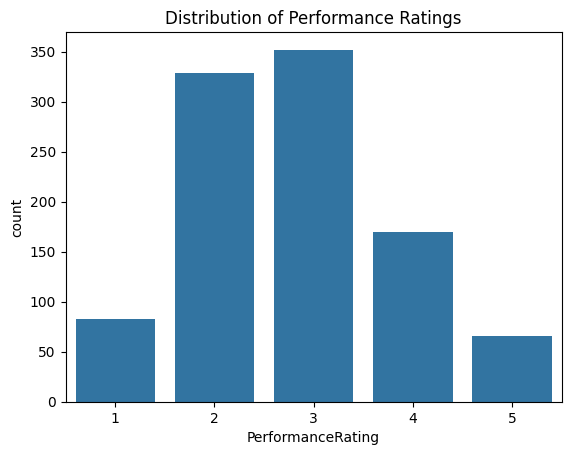

In [3]:
# Countplot of Performance Rating
sns.countplot(data=df, x='PerformanceRating')
plt.title('Distribution of Performance Ratings')
plt.show()


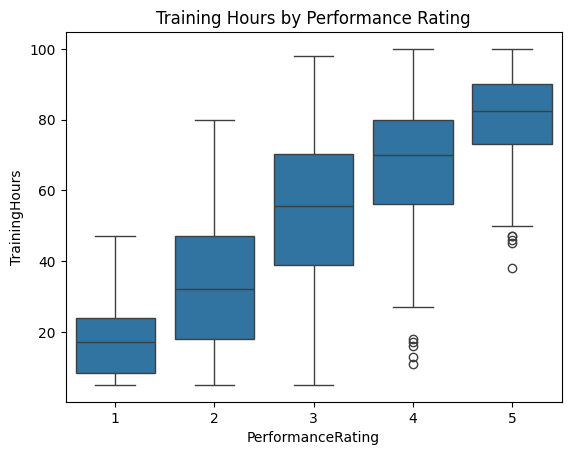

In [4]:
# Boxplot of TrainingHours vs Performance
sns.boxplot(data=df, x='PerformanceRating', y='TrainingHours')
plt.title('Training Hours by Performance Rating')
plt.show()


 # 3. Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder

df = df.drop('EmployeeID', axis=1)

# Encode categorical columns
label_encoders = {}
for col in ['Gender', 'Department']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']


# 4. Train/Test Split + Model Training

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.71      0.83        21
           2       0.81      0.91      0.86        70
           3       0.76      0.81      0.79        68
           4       0.54      0.48      0.51        27
           5       0.70      0.50      0.58        14

    accuracy                           0.77       200
   macro avg       0.76      0.68      0.71       200
weighted avg       0.77      0.77      0.76       200



# 5. Save Model

In [7]:
import joblib

# Save model and label encoders
joblib.dump(model, '../models/performance_model.pkl')
joblib.dump(label_encoders, '../models/label_encoders.pkl')


['../models/label_encoders.pkl']